<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_46_Logistics_Regression_(Practical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import math

# Problem Statement

You have been given a dataset that includes all the medical condition of a patient. You need to build a classifier that can predict how likely a patient can get a heart stroke.

# Importing the dataset

Link: https://drive.google.com/file/d/1p8hWQ21__REcBorgBxO9lcRUuxa8ONIu/view?usp=sharing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA - Exploratory Data Analysis (DE,DM,DC,DV)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [10]:
# Remove the 'id' column
df.drop('id', axis=1, inplace=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df.gender.nunique()

3

In [13]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: >

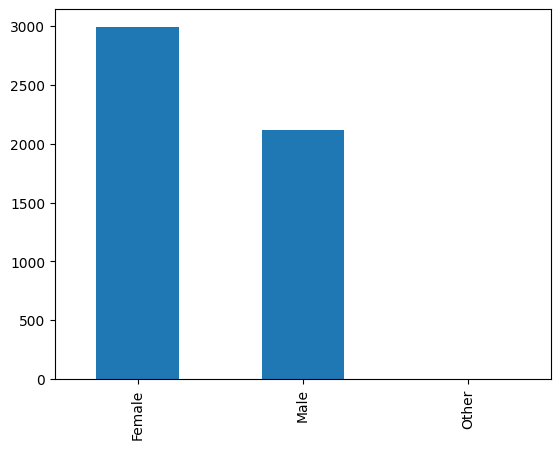

In [15]:
df.gender.value_counts().plot(kind='bar')

In [16]:
df.gender.replace('Other', 'Female', inplace=True)

In [17]:
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [18]:
le = LabelEncoder()

In [19]:
le.fit_transform(df.gender)

array([1, 0, 1, ..., 0, 1, 0])

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
df.gender = le.fit_transform(df.gender)

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
# Show me the datapoint(s) where Age == 0.08
df[df.age == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,0,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,1,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [24]:
# Provide all the datatpoints where work_type = 'children'
df[df.work_type == "children"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,0,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,0,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,1,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,0,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,1,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,0,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,1,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,1,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,1,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [25]:
#0.08 -> 8 Days
0

0

In [26]:
"""
x >= 0.5 (Ceiling)
x < 0.5 (Floor)

# Where ever there will be 0, re-assign it as 1
"""

'\nx >= 0.5 (Ceiling)\nx < 0.5 (Floor)\n\n# Where ever there will be 0, re-assign it as 1\n'

In [27]:
"""
1
1.x ->2
"""

'\n1\n1.x ->2\n'

In [28]:
for i in range(len(df.age)):
  difference = df.age[i] - int(df.age[i])

  if difference >= 0.5:
    df.age[i] = math.ceil(df.age[i])
  else:
    df.age[i] = math.floor(df.age[i])

<ipython-input-28-8c5cb4f605af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[i] = math.floor(df.age[i])
<ipython-input-28-8c5cb4f605af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[i] = math.ceil(df.age[i])


In [29]:
df.age[0]

67.0

In [30]:
df[df.work_type == "children"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,0,1.0,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,0,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,1,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,0,3.0,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,1,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,0,1.0,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,1,13.0,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,1,1.0,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,1,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [31]:
df[df.age==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
564,0,0.0,0,0,No,children,Rural,73.71,16.2,Unknown,0
996,1,0.0,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,0,0.0,0,0,No,children,Rural,55.86,16.0,Unknown,0
1600,1,0.0,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,0,0.0,0,0,No,children,Urban,139.67,14.1,Unknown,0
1999,1,0.0,0,0,No,children,Rural,146.97,18.5,Unknown,0
2030,1,0.0,0,0,No,children,Urban,73.02,NaN,Unknown,0
2579,1,0.0,0,0,No,children,Urban,127.78,20.8,Unknown,0
2898,1,0.0,0,0,No,children,Urban,58.35,18.6,Unknown,0
3295,1,0.0,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [32]:
df.age = df.age.astype('int')

In [33]:
df.age.replace(0,1, inplace=True)

In [34]:
df[df.age==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 439.3+ KB


In [36]:
df.hypertension

0       0
1       0
2       0
3       0
4       1
       ..
5105    1
5106    0
5107    0
5108    0
5109    0
Name: hypertension, Length: 5110, dtype: int64

In [37]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [38]:
# 80 -> Train & 20 -> Test
(5110 * 80)/100

4088.0

In [39]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [40]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [41]:
df.ever_married = le.fit_transform(df.ever_married)

In [42]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1


In [43]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [44]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [46]:
#Working -> Private, Self-employed, Govt_job
#Never_worked -> children, Never_worked

In [47]:
df.work_type.replace(['Private', 'Self-employed', 'Govt_job', 'children'],
                     ['Worked', 'Worked', 'Worked', 'Never_worked'], inplace=True)

In [48]:
df.work_type = le.fit_transform(df.work_type)

In [49]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,1,1,Rural,202.21,NaN,never smoked,1
2,1,80,0,1,1,1,Rural,105.92,32.5,never smoked,1
3,0,49,0,0,1,1,Urban,171.23,34.4,smokes,1
4,0,79,1,0,1,1,Rural,174.12,24.0,never smoked,1


In [50]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [51]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [52]:
df.Residence_type = le.fit_transform(df.Residence_type)

In [53]:
df.bmi.isnull().sum()

201

In [54]:
# Mean
df.bmi.mean()

28.893236911794666

In [55]:
# Median
df.bmi.median()

28.1

In [56]:
# Mode
df.bmi.mode()

0    28.7
Name: bmi, dtype: float64

In [57]:
df.bmi.fillna(df.bmi.mean(), inplace=True)

In [58]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,1,228.69,36.600000,formerly smoked,1
1,0,61,0,0,1,1,0,202.21,28.893237,never smoked,1


In [59]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [60]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [61]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,1,228.69,36.600000,formerly smoked,1
1,0,61,0,0,1,1,0,202.21,28.893237,never smoked,1
2,1,80,0,1,1,1,0,105.92,32.500000,never smoked,1
3,0,49,0,0,1,1,1,171.23,34.400000,smokes,1
4,0,79,1,0,1,1,0,174.12,24.000000,never smoked,1


In [62]:
# Show the smoking_status of all the patients where work_type is 'children'
df.loc[df.work_type=='children', ['work_type','smoking_status']]

,work_type,smoking_status


In [63]:
df.loc[df.work_type=='children', ['smoking_status']] = df.loc[df.work_type == 'children', ['smoking_status']].replace('Unknown', 'never_smoked')

In [64]:
df.loc[df.work_type=='children', ['work_type','smoking_status']]

,work_type,smoking_status


In [65]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [66]:
df.smoking_status.replace('never smoked', 'never_smoked', inplace=True)

In [67]:
df.smoking_status.replace('formerly smoked', 'formerly_smoked', inplace=True)

In [68]:
df.smoking_status.value_counts()

never_smoked       1892
Unknown            1544
formerly_smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [69]:
newdf = df.copy()

In [70]:
ohe = OneHotEncoder(sparse=False)

In [71]:
newcol = ohe.fit_transform(df[['smoking_status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
newcol

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [73]:
'Unknown', 'formerly_smoked', 'never_smoked', 'smokes'

('Unknown', 'formerly_smoked', 'never_smoked', 'smokes')

In [74]:
df.smoking_status

0       formerly_smoked
1          never_smoked
2          never_smoked
3                smokes
4          never_smoked
             ...       
5105       never_smoked
5106       never_smoked
5107       never_smoked
5108    formerly_smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [75]:
df[['Unknown', 'formerly_smoked', 'never_smoked', 'smokes']] = newcol

In [76]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly_smoked,never_smoked,smokes
0,1,67,0,1,1,1,1,228.69,36.600000,formerly_smoked,1,0.0,1.0,0.0,0.0
1,0,61,0,0,1,1,0,202.21,28.893237,never_smoked,1,0.0,0.0,1.0,0.0
2,1,80,0,1,1,1,0,105.92,32.500000,never_smoked,1,0.0,0.0,1.0,0.0
3,0,49,0,0,1,1,1,171.23,34.400000,smokes,1,0.0,0.0,0.0,1.0
4,0,79,1,0,1,1,0,174.12,24.000000,never_smoked,1,0.0,0.0,1.0,0.0


In [77]:
df.drop(['smoking_status', 'smokes'], axis=1, inplace=True)

In [78]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
0,1,67,0,1,1,1,1,228.69,36.600000,1,0.0,1.0,0.0
1,0,61,0,0,1,1,0,202.21,28.893237,1,0.0,0.0,1.0
2,1,80,0,1,1,1,0,105.92,32.500000,1,0.0,0.0,1.0
3,0,49,0,0,1,1,1,171.23,34.400000,1,0.0,0.0,0.0
4,0,79,1,0,1,1,0,174.12,24.000000,1,0.0,0.0,1.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   stroke             5110 non-null   int64  
 10  Unknown            5110 non-null   float64
 11  formerly_smoked    5110 non-null   float64
 12  never_smoked       5110 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 519.1 KB


In [80]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
gender,1.000000,-0.027485,0.021275,0.085717,-0.029936,-0.090284,-0.005937,0.054580,-0.025464,0.009117,0.059658,0.042738,-0.098813
age,-0.027485,1.000000,0.276430,0.263840,0.679106,0.640529,0.014228,0.238216,0.325789,0.245285,-0.378090,0.236894,0.119213
hypertension,0.021275,0.276430,1.000000,0.108306,0.164243,0.131892,-0.007913,0.174474,0.160189,0.127904,-0.141501,0.058853,0.065063
heart_disease,0.085717,0.263840,0.108306,1.000000,0.114644,0.093402,0.003092,0.161857,0.038899,0.134914,-0.066731,0.066804,-0.021856
ever_married,-0.029936,0.679106,0.164243,0.114644,1.000000,0.554470,0.006261,0.155068,0.335705,0.108340,-0.332081,0.171256,0.102845
work_type,-0.090284,0.640529,0.131892,0.093402,0.554470,1.000000,-0.002051,0.103682,0.442423,0.085583,-0.507652,0.164250,0.228040
Residence_type,-0.005937,0.014228,-0.007913,0.003092,0.006261,-0.002051,1.000000,-0.004946,-0.000120,0.015458,-0.002036,0.007654,-0.024466
avg_glucose_level,0.054580,0.238216,0.174474,0.161857,0.155068,0.103682,-0.004946,1.000000,0.168751,0.131945,-0.095131,0.068111,0.023885
bmi,-0.025464,0.325789,0.160189,0.038899,0.335705,0.442423,-0.000120,0.168751,1.000000,0.038947,-0.264956,0.104257,0.106220
stroke,0.009117,0.245285,0.127904,0.134914,0.108340,0.085583,0.015458,0.131945,0.038947,1.000000,-0.055892,0.064556,-0.004129


<Axes: >

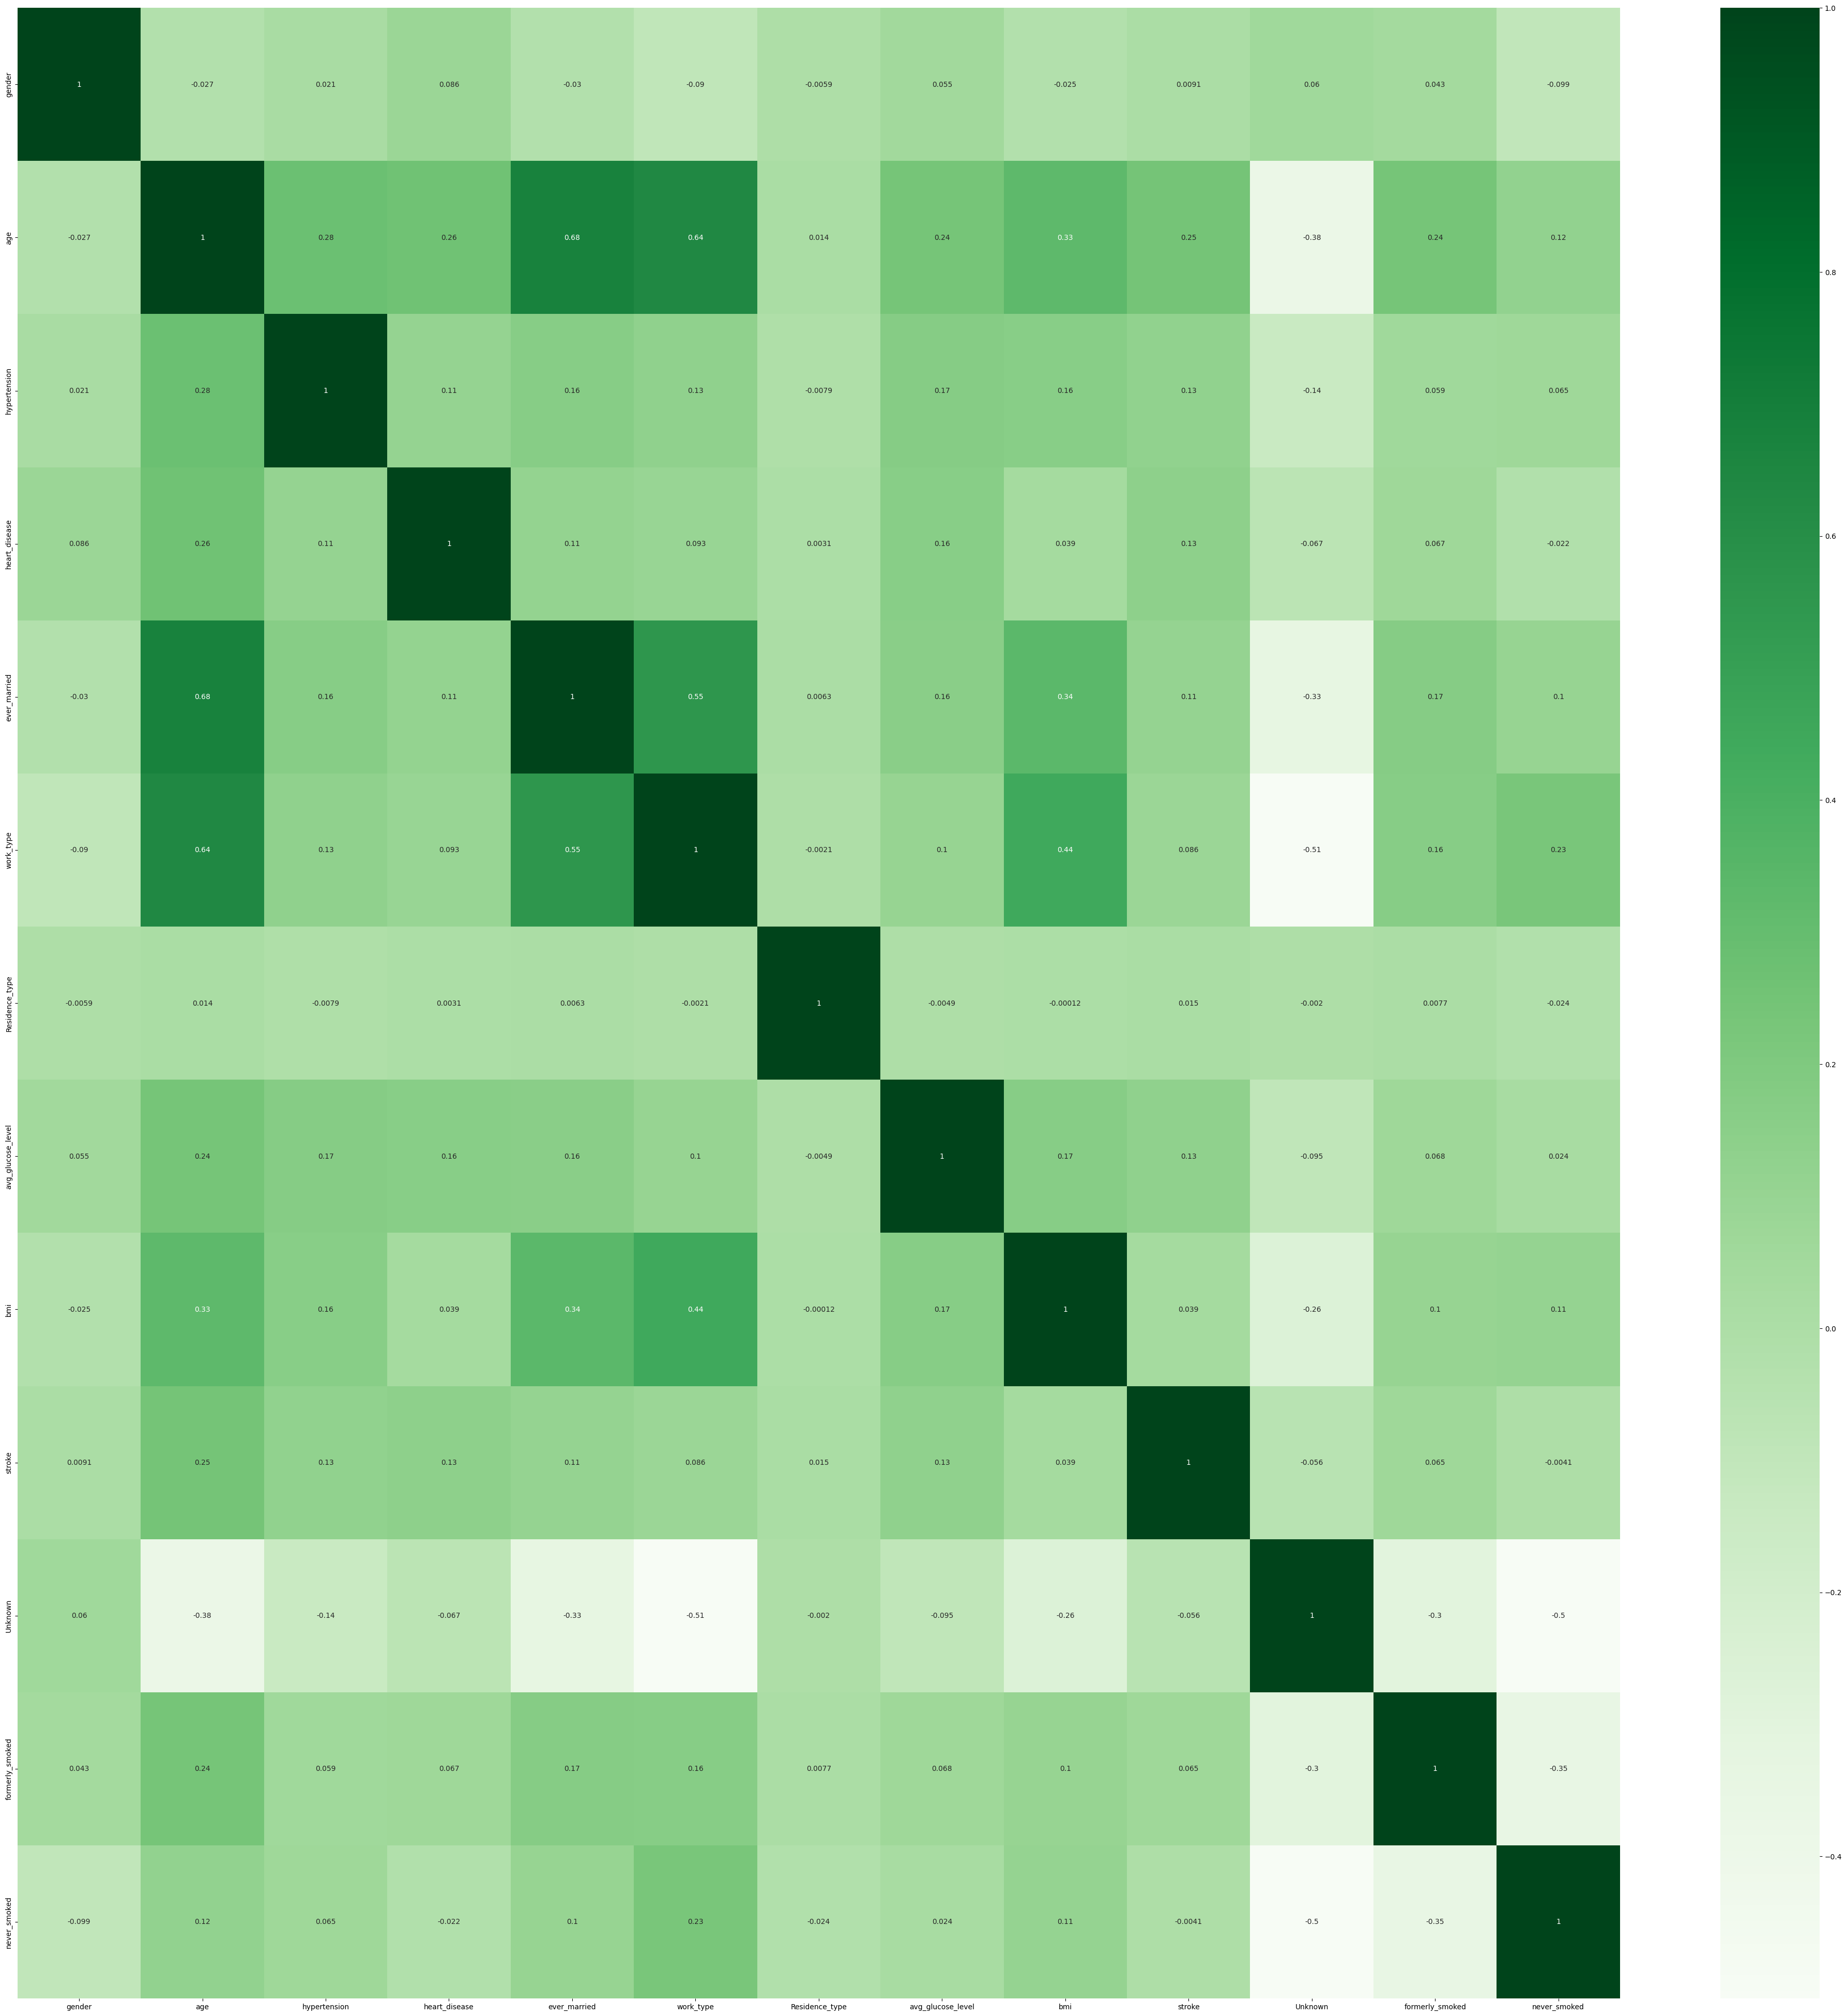

In [81]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap="Greens")

# Model Selection

In [82]:
lr_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# Splitting the Dataset

In [83]:
X = df.drop('stroke', axis=1)
y = df.stroke

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model

In [85]:
lr_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# Testing the model

In [86]:
lr_y_pred = lr_classifier.predict(X_test)
dt_y_pred = dt_classifier.predict(X_test)
rf_y_pred = rf_classifier.predict(X_test)

In [87]:
final = pd.DataFrame({"Actual": y_test,
                      "Logistic_Regression": lr_y_pred,
                      "Decision_Tree": dt_y_pred,
                      "Random_Forest": rf_y_pred})

In [88]:
final

,Actual,Logistic_Regression,Decision_Tree,Random_Forest
4688,0,0,0,0
4478,0,0,0,0
3849,0,0,0,0
4355,0,0,1,0
3826,0,0,0,0
...,...,...,...,...
3605,0,0,0,0
4934,0,0,0,0
4835,0,0,0,0
4105,0,0,0,0


In [89]:
final.corr()

,Actual,Logistic_Regression,Decision_Tree,Random_Forest
Actual,1.000000,NaN,0.162303,-0.007953
Logistic_Regression,NaN,NaN,NaN,NaN
Decision_Tree,0.162303,NaN,1.000000,0.144156
Random_Forest,-0.007953,NaN,0.144156,1.000000


# Performance Checking - Confusion Matrix

In [90]:
confusion_matrix(y_test, lr_y_pred)

array([[960,   0],
       [ 62,   0]])

In [92]:
#accuracy = (960 + 0)/ Total (960 + 0 + 62 + 0)

In [94]:
#(960 + 0)/(960 + 0 + 62 + 0) = 0.939 = 0.94 = 94%

In [95]:
confusion_matrix(y_test, dt_y_pred)

array([[925,  35],
       [ 51,  11]])

In [97]:
#(922 + 8)/(922 + 38 + 54 + 8) = 0.909 = 0.91 = 91%

In [98]:
confusion_matrix(y_test, rf_y_pred)

array([[959,   1],
       [ 62,   0]])

In [99]:
#(959 + 1)/(959+1+61+1) = 0.939 = 0.94 = 94%

In [100]:
classification_report(y_test, lr_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       960\n           1       0.00      0.00      0.00        62\n\n    accuracy                           0.94      1022\n   macro avg       0.47      0.50      0.48      1022\nweighted avg       0.88      0.94      0.91      1022\n'